In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

In [7]:
data = pd.read_csv('../Data/clean/finalclean3.0.csv', encoding = 'latin-1', low_memory = False)
x = data.iloc[:1000,:9].values
y = data.iloc[:1000,10].values

data.head()

,JAARTAL,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,PRODUCTSOORT,Aantal Aansluitingen,%Leveringsrichting,%Fysieke status,%Soort aansluiting,Soort aansluiting Naam,SJV,%SJV laag tarief,%Slimme Meter
0,2018,De Ruyterkade Steigers,1011AA,1011AB,0,35,10,3,31,3x25,14403,4,2
1,2018,De Ruyterkade,1011AC,1011AC,0,39,10,5,28,3x80,18739,5,2
2,2018,De Ruyterkade,1011AC,1011AC,1,24,10,7,38,G6,6589,0,2
3,2018,Oosterdokskade,1011AD,1011AD,0,19,10,0,58,3x25,4026,5,0
4,2018,Oosterdokskade,1011AD,1011AE,1,11,10,0,82,G4,710,0,0


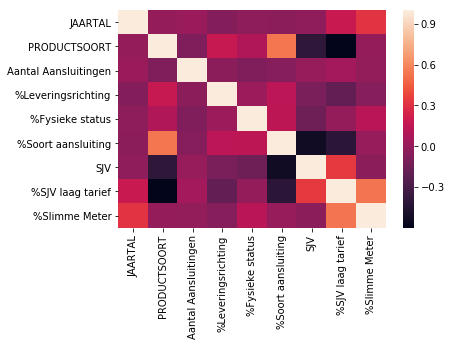

In [9]:
sb.heatmap(data.corr())

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,1] = labelencoder.fit_transform(x[:,1])
x[:,2] = labelencoder.fit_transform(x[:,2])
x[:,3] = labelencoder.fit_transform(x[:,3])



onehotencoder = OneHotEncoder(categorical_features = [1])
onehotencoder = OneHotEncoder(categorical_features = [2])
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()

In [11]:
x = x[:,1:]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = regressor.predict(x_test)
y_pred

array([  6.37575564e+12,   6.37575562e+12,  -2.51734863e+03,
         6.37575560e+12,   5.23863477e+03,   3.62501719e+04,
         5.20271777e+03,   6.37575557e+12,   6.37575558e+12,
         4.51297656e+03,   6.37575560e+12,   7.09745605e+03,
         6.37575561e+12,   4.31736523e+03,   9.11069238e+03,
         6.58230957e+03,   1.17806836e+03,   5.68671777e+03,
         6.73006641e+03,  -2.21039453e+03,   6.24092090e+03,
        -7.31715820e+02,   3.59772070e+03,   6.37575558e+12,
         6.71503516e+03,   3.60204883e+03,   6.89994629e+03,
         9.50467969e+03,   6.36641016e+03,   1.26090625e+04,
         7.93015430e+03,   1.60467578e+04,   6.93196289e+03,
         2.04141592e+04,  -1.65795703e+03,   4.56023438e+03,
         2.68734863e+03,   3.57189941e+03,   3.13457324e+03,
         5.95088770e+03,   6.37575558e+12,   6.37575563e+12,
         8.57566211e+03,   8.41373145e+03,   6.37575558e+12,
         6.37575562e+12,   9.24778223e+03,  -3.24473340e+03,
         6.37575558e+12,

In [15]:
print(regressor.coef_)

[ -6.37575556e+12  -6.37575555e+12  -6.37575555e+12  -6.37575556e+12
  -6.37575554e+12  -6.37575555e+12  -6.37575555e+12  -6.37575555e+12
  -6.37575555e+12  -6.37575555e+12  -6.37575555e+12  -6.37575555e+12
  -6.37575556e+12  -6.37575555e+12  -6.37575555e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575555e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575557e+12  -6.37575557e+12
  -6.37575557e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12  -6.37575556e+12
  -6.37575556e+12   2.01794137e-12  -6.37575557e+12  -6.37575557e+12
   5.41433565e-12  -6.37575556e+12

In [16]:
print(regressor.intercept_)

6.37575554703e+12


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-4.2245677172098522e+17